#Preparation

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import collections
import re

drive.mount('/content/drive')
directory = '/content/drive/MyDrive/Data Projects/Wordle/Files'

pd.set_option("display.max_rows", None, "display.max_columns", None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import data
solutions = pd.read_csv(f'{directory}/valid_solutions.csv')
letters = pd.read_csv(f'{directory}/Letters.csv')
Speech = pd.read_csv(f'{directory}/mobypos.csv', encoding= 'unicode_escape')

#Analysis

##Letter Frequency

In [ ]:
#convert to upercase
solutions['word'] = solutions['word'].str.upper()

#create list of words
solutions_word_list = solutions['word'].to_list()

In [ ]:
#create single sting of all charachters for frequency count
SolutionString = ''

for words in solutions.index:
  SolutionString += str(solutions['word'][words])

In [ ]:
#function to count frequency of charachters in a string
def char_frequency(str1):
    dict = {}
    for n in str1:
        keys = dict.keys()
        if n in keys:
            dict[n] += 1
        else:
            dict[n] = 1
    global freq
    freq = pd.DataFrame.from_dict(dict,orient='index').sort_values(0, ascending=False).reset_index()
    return freq

In [ ]:
#get frequency of solution charachters and put in a dataframe
solution_frequency = char_frequency(SolutionString)
solution_frequency = solution_frequency.rename(columns={'index':'Letter', 0:'Solutions_Frequency'})
solution_frequency = solution_frequency.merge(letters, on='Letter', how='left')
Letters = solution_frequency.copy()

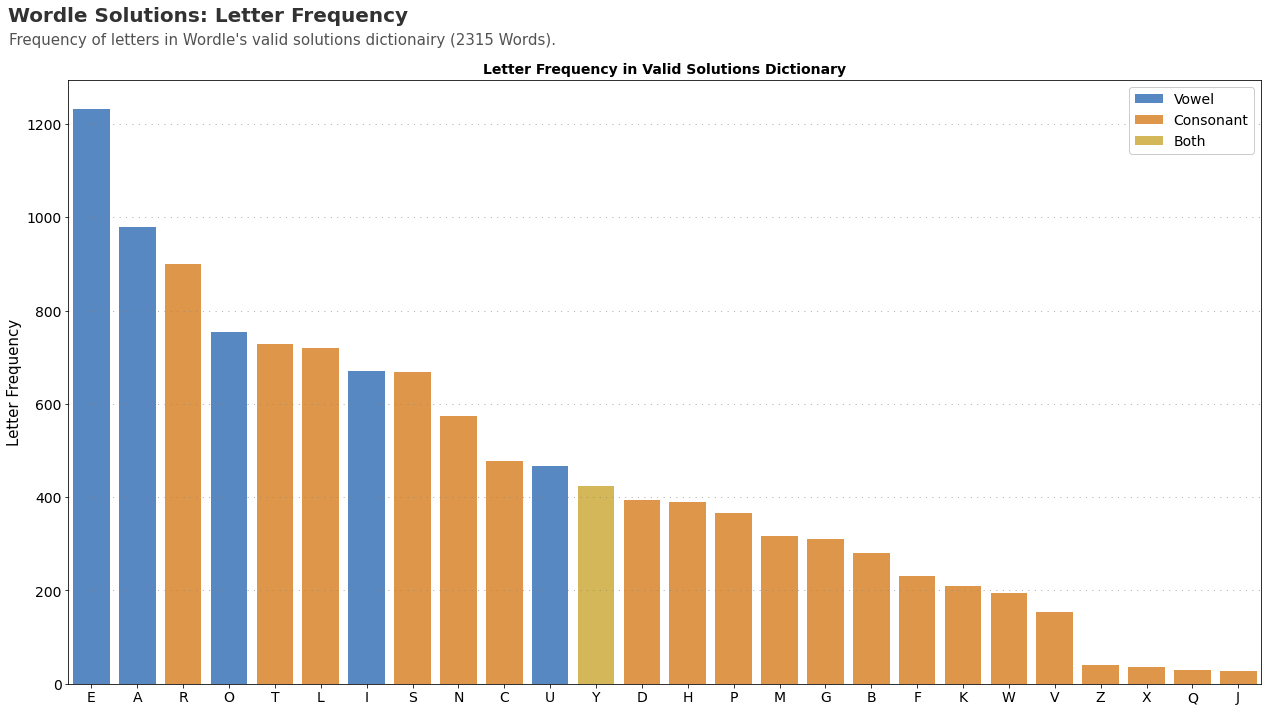

In [ ]:
#Plot Letter Frequency
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)

#Figure annotations
plt.figtext(0.003, 1.059,'Wordle Solutions: Letter Frequency', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Frequency of letters in Wordle's valid solutions dictionairy (2315 Words).", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

palette ={'Consonant': '#f79831', 'Vowel': '#4686d4', 'Both': '#e8c243'}

ax1 = ax.add_subplot()
plt.title(f'Letter Frequency in Valid Solutions Dictionary', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax.patch.set_facecolor('white')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))

sns.barplot(data=Letters.sort_values(by='Solutions_Frequency', ascending=False), x='Letter', y='Solutions_Frequency', ax=ax1, hue='Status', palette=palette, dodge=False)
plt.legend(loc="upper right", ncol=1, framealpha=1, fontsize=14)   
plt.xlabel(f'', fontsize = 13, fontfamily='sans-serif')
plt.ylabel('Letter Frequency', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');

ax.savefig(f'{directory}/Solutions Letter Frequency.png' , bbox_inches="tight", dpi=600)

##Next Letter

In [ ]:
#Read in empty frame to be filled
NextLetter = pd.read_csv(f'{directory}/Next Letter.csv')

Alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

#Calculating next most likely letters
for letter in Alphabet:
  wordsList = []
  letterList = []
  for wordSL in solutions_word_list:
    if letter in wordSL: 
      wordsList.append(wordSL)
  for wordWL in wordsList:
    wordWL = re.sub(letter,'',wordWL,1)
    for letterWL in wordWL:
      letterList.append(letterWL)
  char_frequency(letterList)
  freq = freq.rename(columns= {'index':'Yaxis', freq.columns[1]:letter})
  freq[letter] = (freq[letter] / sum(freq[letter])) * 2000
  NextLetter = NextLetter.merge(freq, on='Yaxis', how='left')
NextLetter = NextLetter.fillna(0)

In [ ]:
#Function for Plotting related letters

def NextLetterDef(axX,ColName,SubGS,YtickSize):
  axX = ax.add_subplot(gs[0, SubGS])
  plt.title(f'{ColName}', fontweight='bold', fontsize=14, fontfamily='sans-serif')
  axX.scatter(x = NextLetter['Xaxis'], y = NextLetter['Yaxis'], s = NextLetter[ColName], marker="s", c=NextLetter[ColName], cmap='RdBu', zorder = 2)
  # plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 1,  dashes = (1,7))
  plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 1, zorder = 1,  dashes = (1,7))
  plt.gca().invert_yaxis()
  plt.xlabel(f'', fontsize = 13, fontfamily='sans-serif')   
  plt.ylabel('', fontsize = 15, fontfamily='sans-serif')
  plt.xticks(fontsize=0, fontfamily='sans-serif', color='#FFFFFF');
  plt.yticks(fontsize=YtickSize, fontfamily='sans-serif');
  axX.tick_params(direction='out', length=0);

In [ ]:
#defining plots
ax2 = []
ax3 = []
ax4 = []
ax5 = []
ax6 = []
ax7 = []
ax8 = []
ax9 = []
ax10 = []
ax11 = []
ax12 = []
ax13 = []
ax14 = []
ax15 = []
ax16 = []
ax17 = []
ax18 = []
ax19 = []
ax20 = []
ax21 = []
ax22 = []
ax23 = []
ax24 = []
ax25 = []
ax26 = []

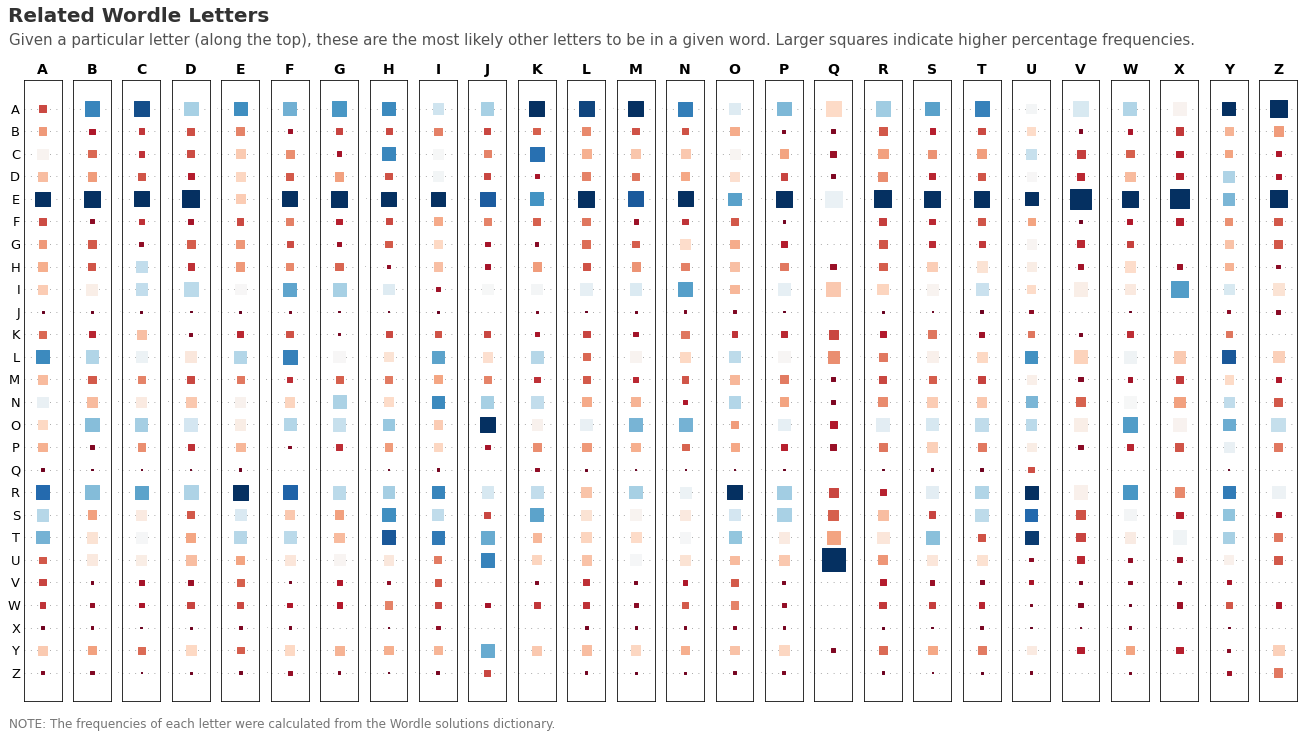

In [ ]:
#Plotting Related Letters
ax = plt.figure(figsize = (18, 9), constrained_layout=True)
gs = ax.add_gridspec(1, 26)

#Figure annotations
plt.figtext(0.003, 1.059,'Related Wordle Letters', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, 'Given a particular letter (along the top), these are the most likely other letters to be in a given word. Larger squares indicate higher percentage frequencies.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.004, -0.03, 'NOTE: The frequencies of each letter were calculated from the Wordle solutions dictionary.', fontsize = 12, color = '#757575')


NextLetterDef(ax1,'A',0,13)
NextLetterDef(ax2,'B',1,0)
NextLetterDef(ax3,'C',2,0)
NextLetterDef(ax4,'D',3,0)
NextLetterDef(ax5,'E',4,0)
NextLetterDef(ax6,'F',5,0)
NextLetterDef(ax7,'G',6,0)
NextLetterDef(ax8,'H',7,0)
NextLetterDef(ax9,'I',8,0)
NextLetterDef(ax10,'J',9,0)
NextLetterDef(ax11,'K',10,0)
NextLetterDef(ax12,'L',11,0)
NextLetterDef(ax13,'M',12,0)
NextLetterDef(ax14,'N',13,0)
NextLetterDef(ax15,'O',14,0)
NextLetterDef(ax16,'P',15,0)
NextLetterDef(ax17,'Q',16,0)
NextLetterDef(ax18,'R',17,0)
NextLetterDef(ax19,'S',18,0)
NextLetterDef(ax20,'T',19,0)
NextLetterDef(ax21,'U',20,0)
NextLetterDef(ax22,'V',21,0)
NextLetterDef(ax23,'W',22,0)
NextLetterDef(ax24,'X',23,0)
NextLetterDef(ax25,'Y',24,0)
NextLetterDef(ax26,'Z',25,0)

ax.patch.set_facecolor('white')

ax.savefig(f'{directory}/Related Letters.png' , bbox_inches="tight", dpi=600)

## Common Positions

In [ ]:
#creating Dataframe to be filled
CommonPosition = pd.read_csv(f'{directory}/Next Letter.csv')
CommonPosition = CommonPosition[['Yaxis']]
CommonPosition[['1','2','3','4','5']] = 0
CommonPosition.set_index('Yaxis', inplace=True)
Spots = ['1','2','3','4','5']

In [ ]:
#calculating common position

for SolutionWord in solutions_word_list:
  for i in range(0,5):
    CommonPosition[Spots[i]][SolutionWord[i]] = CommonPosition[Spots[i]][SolutionWord[i]] + 1

#preparing for ploting
CommonPosition = CommonPosition.reset_index()
CommonPosition = CommonPosition.pivot_table(columns='Yaxis').reset_index()
CommonPosition['axis2'] = 0.5

for alpha in Alphabet:
  CommonPosition[alpha] = (CommonPosition[alpha] / sum(CommonPosition[alpha])) * 1100

In [ ]:
#Function for Plotting common positions
def CommonPositionDef(axX,ColName,SubGS1,SubGS2,XtickSize):
  axX = ax.add_subplot(gs[SubGS1, SubGS2])
  plt.title(f'', fontweight='bold', fontsize=14, fontfamily='sans-serif')
  axX.scatter(x = CommonPosition['index'], y = CommonPosition['axis2'], s = CommonPosition[ColName], marker="s", c=CommonPosition[ColName], cmap='RdBu', zorder = 2)
  plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 1,  dashes = (1,7))
  plt.xlabel(f'', fontsize = 14, fontfamily='sans-serif')   
  plt.ylabel(ColName, fontsize = 14, fontfamily='sans-serif', fontweight='bold', rotation='horizontal', va="center")
  axX.xaxis.set_ticks_position('top')
  plt.xticks(fontsize=XtickSize, fontfamily='sans-serif');
  plt.yticks(fontsize=0, fontfamily='sans-serif', color='#FFFFFF')
  axX.tick_params(direction='out', length=0);


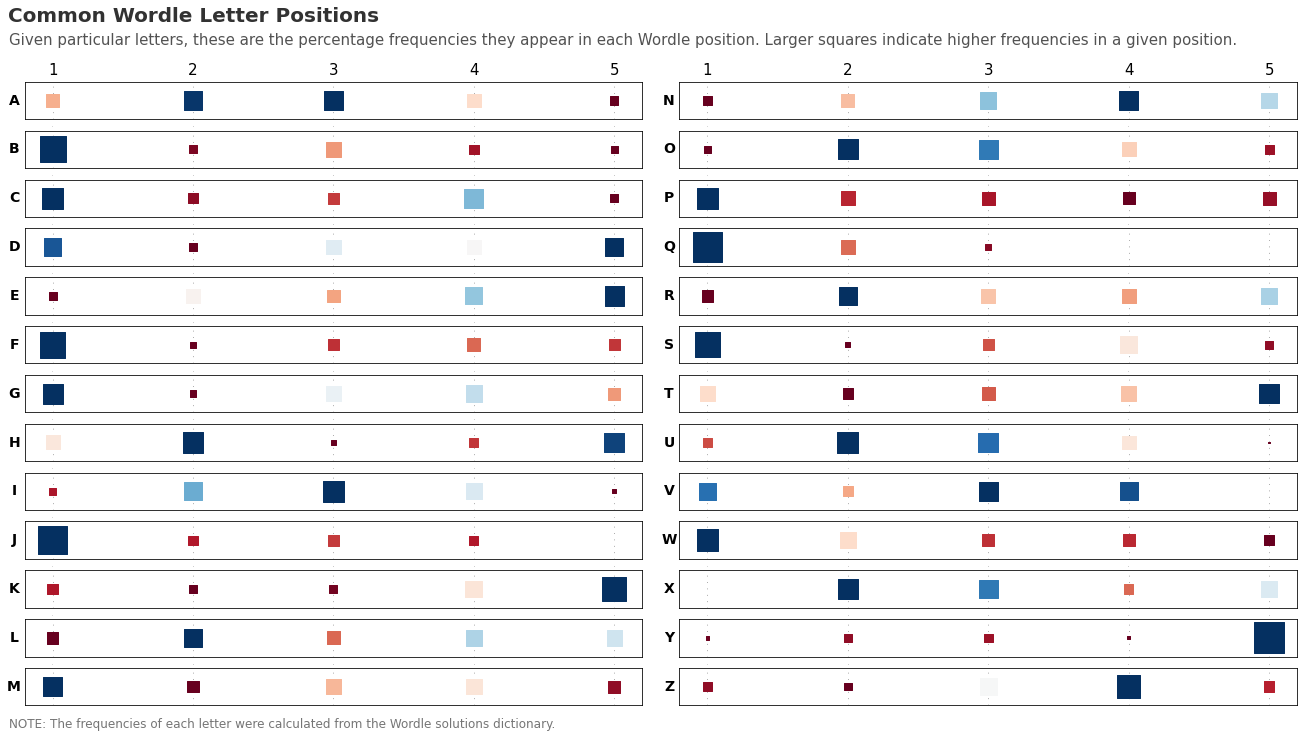

In [ ]:
#Plotting common position
ax = plt.figure(figsize = (18, 9), constrained_layout=True)
gs = ax.add_gridspec(13, 2)

plt.figtext(0.003, 1.059,'Common Wordle Letter Positions', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, 'Given particular letters, these are the percentage frequencies they appear in each Wordle position. Larger squares indicate higher frequencies in a given position.', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')
plt.figtext(0.004, -0.03, 'NOTE: The frequencies of each letter were calculated from the Wordle solutions dictionary.', fontsize = 12, color = '#757575')

CommonPositionDef(ax1,'A',0,0,15)
CommonPositionDef(ax2,'B',1,0,0)
CommonPositionDef(ax3,'C',2,0,0)
CommonPositionDef(ax4,'D',3,0,0)
CommonPositionDef(ax5,'E',4,0,0)
CommonPositionDef(ax6,'F',5,0,0)
CommonPositionDef(ax7,'G',6,0,0)
CommonPositionDef(ax8,'H',7,0,0)
CommonPositionDef(ax9,'I',8,0,0)
CommonPositionDef(ax10,'J',9,0,0)
CommonPositionDef(ax11,'K',10,0,0)
CommonPositionDef(ax12,'L',11,0,0)
CommonPositionDef(ax13,'M',12,0,0)
CommonPositionDef(ax14,'N',0,1,15)
CommonPositionDef(ax15,'O',1,1,0)
CommonPositionDef(ax16,'P',2,1,0)
CommonPositionDef(ax17,'Q',3,1,0)
CommonPositionDef(ax18,'R',4,1,0)
CommonPositionDef(ax19,'S',5,1,0)
CommonPositionDef(ax20,'T',6,1,0)
CommonPositionDef(ax21,'U',7,1,0)
CommonPositionDef(ax22,'V',8,1,0)
CommonPositionDef(ax23,'W',9,1,0)
CommonPositionDef(ax24,'X',10,1,0)
CommonPositionDef(ax25,'Y',11,1,0)
CommonPositionDef(ax26,'Z',12,1,0)

ax.patch.set_facecolor('white')

ax.savefig(f'{directory}/Common Letter Positions.png' , bbox_inches="tight", dpi=600)

## Positional Frequency

In [ ]:
#Creating Dataframes for each position
solutions_1_Letters = [word[0] for word in list(solutions_word_list)]
solutions_2_Letters = [word[1] for word in list(solutions_word_list)]
solutions_3_Letters = [word[2] for word in list(solutions_word_list)]
solutions_4_Letters = [word[3] for word in list(solutions_word_list)]
solutions_5_Letters = [word[4] for word in list(solutions_word_list)]

solutions_1_Frequency = char_frequency(solutions_1_Letters)
solutions_2_Frequency = char_frequency(solutions_2_Letters)
solutions_3_Frequency = char_frequency(solutions_3_Letters)
solutions_4_Frequency = char_frequency(solutions_4_Letters)
solutions_5_Frequency = char_frequency(solutions_5_Letters)

solutions_1_Frequency = solutions_1_Frequency.rename(columns={'index':'Letter', 0:'Frequency'})
solutions_2_Frequency = solutions_2_Frequency.rename(columns={'index':'Letter', 0:'Frequency'})
solutions_3_Frequency = solutions_3_Frequency.rename(columns={'index':'Letter', 0:'Frequency'})
solutions_4_Frequency = solutions_4_Frequency.rename(columns={'index':'Letter', 0:'Frequency'})
solutions_5_Frequency = solutions_5_Frequency.rename(columns={'index':'Letter', 0:'Frequency'})

solutions_1_Frequency = solutions_1_Frequency.merge(letters, on=['Letter'], how='left')
solutions_2_Frequency = solutions_2_Frequency.merge(letters, on=['Letter'], how='left')
solutions_3_Frequency = solutions_3_Frequency.merge(letters, on=['Letter'], how='left')
solutions_4_Frequency = solutions_4_Frequency.merge(letters, on=['Letter'], how='left')
solutions_5_Frequency = solutions_5_Frequency.merge(letters, on=['Letter'], how='left')

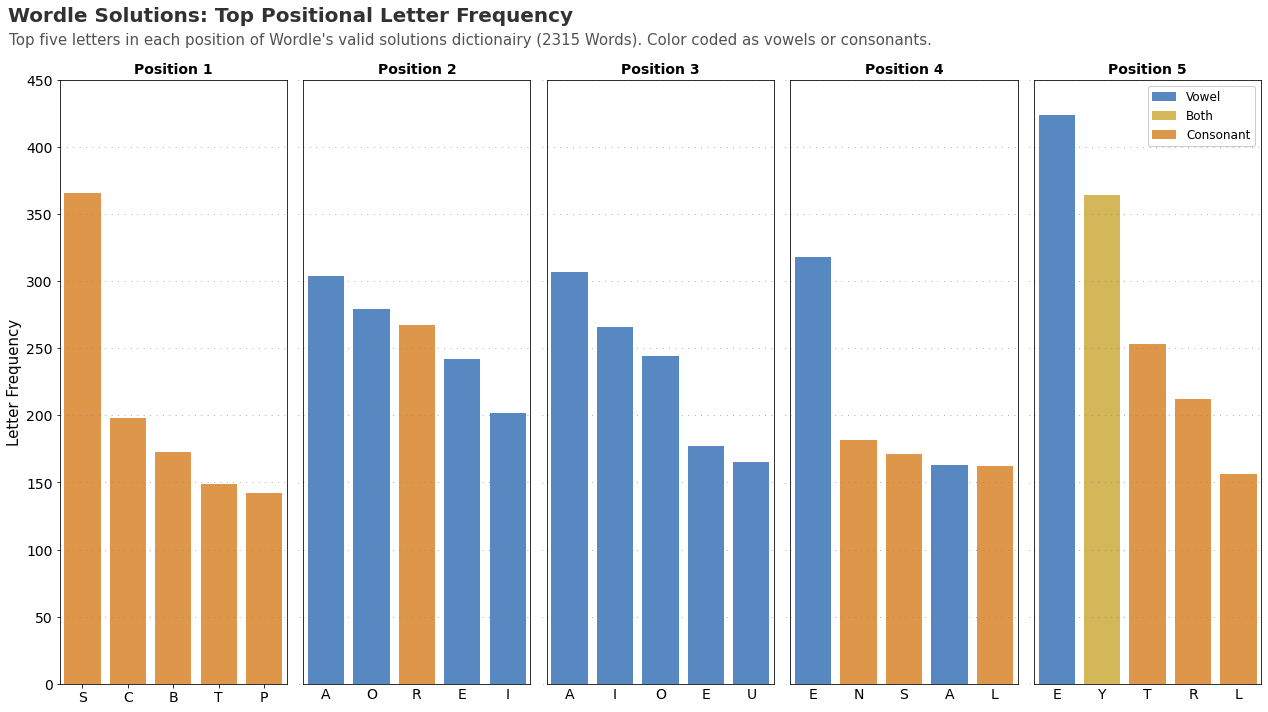

In [ ]:
#Plotting Positional Frequency
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(1, 5)

#Figure annotations
plt.figtext(0.003, 1.059,'Wordle Solutions: Top Positional Letter Frequency', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Top five letters in each position of Wordle's valid solutions dictionairy (2315 Words). Color coded as vowels or consonants.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

palette ={'Consonant': '#f79831', 'Vowel': '#4686d4', 'Both': '#e8c243'}

ax1 = ax.add_subplot(gs[0, 0])
plt.title(f'Position 1', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax.patch.set_facecolor('white')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))

sns.barplot(data=solutions_1_Frequency.sort_values(by='Frequency', ascending=False).head(5), x='Letter', y='Frequency', ax=ax1, hue='Status', palette=palette, dodge=False)
ax1.legend().set_visible(False) 
plt.xlabel(f'', fontsize = 13, fontfamily='sans-serif')
plt.ylabel('Letter Frequency', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,450)


ax2 = ax.add_subplot(gs[0, 1])
plt.title(f'Position 2', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax.patch.set_facecolor('white')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))

sns.barplot(data=solutions_2_Frequency.sort_values(by='Frequency', ascending=False).head(5), x='Letter', y='Frequency', ax=ax2, hue='Status', palette=palette, dodge=False)
ax2.legend().set_visible(False)        
plt.xlabel(f'', fontsize = 13, fontfamily='sans-serif')
plt.ylabel('', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=0, fontfamily='sans-serif');
ax2.tick_params(direction='in', length=0)
plt.ylim(0,450)


ax3 = ax.add_subplot(gs[0, 2])
plt.title(f'Position 3', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax.patch.set_facecolor('white')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))

sns.barplot(data=solutions_3_Frequency.sort_values(by='Frequency', ascending=False).head(5), x='Letter', y='Frequency', ax=ax3, hue='Status', palette=palette, dodge=False)
ax3.legend().set_visible(False)        
plt.xlabel(f'', fontsize = 13, fontfamily='sans-serif')
plt.ylabel('', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=0, fontfamily='sans-serif');
ax3.tick_params(direction='in', length=0)
plt.ylim(0,450)


ax4 = ax.add_subplot(gs[0, 3])
plt.title(f'Position 4', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax.patch.set_facecolor('white')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))

sns.barplot(data=solutions_4_Frequency.sort_values(by='Frequency', ascending=False).head(5), x='Letter', y='Frequency', ax=ax4, hue='Status', palette=palette, dodge=False)
ax4.legend().set_visible(False)        
plt.xlabel(f'', fontsize = 13, fontfamily='sans-serif')
plt.ylabel('', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=0, fontfamily='sans-serif');
ax4.tick_params(direction='in', length=0)
plt.ylim(0,450)


ax5 = ax.add_subplot(gs[0, 4])
plt.title(f'Position 5', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax.patch.set_facecolor('white')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))

sns.barplot(data=solutions_5_Frequency.sort_values(by='Frequency', ascending=False).head(5), x='Letter', y='Frequency', ax=ax5, hue='Status', palette=palette, dodge=False)
plt.legend(loc="upper right", ncol=1, framealpha=1, fontsize=12)
plt.xlabel(f'', fontsize = 13, fontfamily='sans-serif')
plt.ylabel('', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=0, fontfamily='sans-serif');
ax5.tick_params(direction='in', length=0)
plt.ylim(0,450);

ax.savefig(f'{directory}/Positional Letter Frequency.png' , bbox_inches="tight", dpi=600)


## Vowels

In [ ]:
#Reading in list of word where Y is a vowel
YVowels = pd.read_csv(f'{directory}/Ys.csv')
YVowels['word'] = YVowels['word'].str.upper()
solutions = solutions.merge(YVowels, on='word', how='left')
solutions = solutions.fillna(0)

In [ ]:
#Counting vowels
solutions['VowelCount'] = ''

for row in solutions['word'].index:
  vowels = 0
  for letter in solutions['word'][row]:
    if letter in 'AEIOU':
      vowels += 1
  if vowels == 5:
    solutions['VowelCount'][row]= 'Five'
    solutions['Yvowel'][row] = solutions['Yvowel'][row] + 5
  elif vowels == 4:
    solutions['VowelCount'][row] = 'Four'
    solutions['Yvowel'][row] = solutions['Yvowel'][row] + 4
  elif vowels == 3:
    solutions['VowelCount'][row] = 'Three'
    solutions['Yvowel'][row] = solutions['Yvowel'][row] + 3
  elif vowels == 2:
    solutions['VowelCount'][row] = 'Two'
    solutions['Yvowel'][row] = solutions['Yvowel'][row] + 2
  elif vowels == 1:
    solutions['VowelCount'][row] = 'One'
    solutions['Yvowel'][row] = solutions['Yvowel'][row] + 1
  elif vowels == 0:
    solutions['VowelCount'][row] = 'Zero'
    solutions['Yvowel'][row] = solutions['Yvowel'][row] + 0

for row in solutions['Yvowel'].index:
  if solutions['Yvowel'][row] == 5:
    solutions['Yvowel'][row]= 'Five'

  elif solutions['Yvowel'][row] == 4:
    solutions['Yvowel'][row] = 'Four'

  elif solutions['Yvowel'][row] == 3:
    solutions['Yvowel'][row] = 'Three'

  elif solutions['Yvowel'][row] == 2:
    solutions['Yvowel'][row] = 'Two'

  elif solutions['Yvowel'][row] == 1:
    solutions['Yvowel'][row] = 'One'

  elif solutions['Yvowel'][row] == 0:
    solutions['Yvowel'][row] = 'Zero'

In [ ]:
#Preparing vowel counts for Plotting

VowelSolutionsCount = solutions['VowelCount'].value_counts().rename_axis('VowelCount').to_frame('counts')
YVowelSolutionsCount = solutions['Yvowel'].value_counts().rename_axis('Yvowel').to_frame('counts')

VowelSolutionsCount = pd.DataFrame(np.array([[0, 'Zero', 13] ,[1, 'One', 733],[2, 'Two', 1339], [3, 'Three', 227], [4, 'Four', 3], [5, 'Five', 0]]), columns=['Order', 'VowelCount', 'Count'])
yVowelSolutionsCount = pd.DataFrame(np.array([[0, 'Zero', 0] ,[1, 'One', 454],[2, 'Two', 1519], [3, 'Three', 336], [4, 'Four', 6], [5, 'Five', 0]]), columns=['Order', 'VowelCount', 'Count'])

VowelSolutionsCount = VowelSolutionsCount.reset_index(drop=True)
yVowelSolutionsCount = yVowelSolutionsCount.reset_index(drop=True)

VowelSolutionsCount['Y'] = 'A, E, I, O, U'
yVowelSolutionsCount['Y'] = 'A, E, I, O, U, & Y'

VowelSolutionsCount2 = VowelSolutionsCount.append(yVowelSolutionsCount)

VowelSolutionsCount['Proportions'] = ''
VowelSolutionsCount['Count'] = VowelSolutionsCount['Count'].astype(float)
VowelSolutionsCount['Proportions'] = (VowelSolutionsCount['Count'] / 2315) * 100

VowelSolutionsCount2['Proportions'] = ''
VowelSolutionsCount2['Count'] = VowelSolutionsCount2['Count'].astype(float)
VowelSolutionsCount2['Proportions'] = (VowelSolutionsCount2['Count'] / 2315) * 100

VowelSolutionsCount = VowelSolutionsCount.sort_values('Order', ascending=False)
VowelSolutionsCount2 = VowelSolutionsCount2.sort_values('Order', ascending=False)

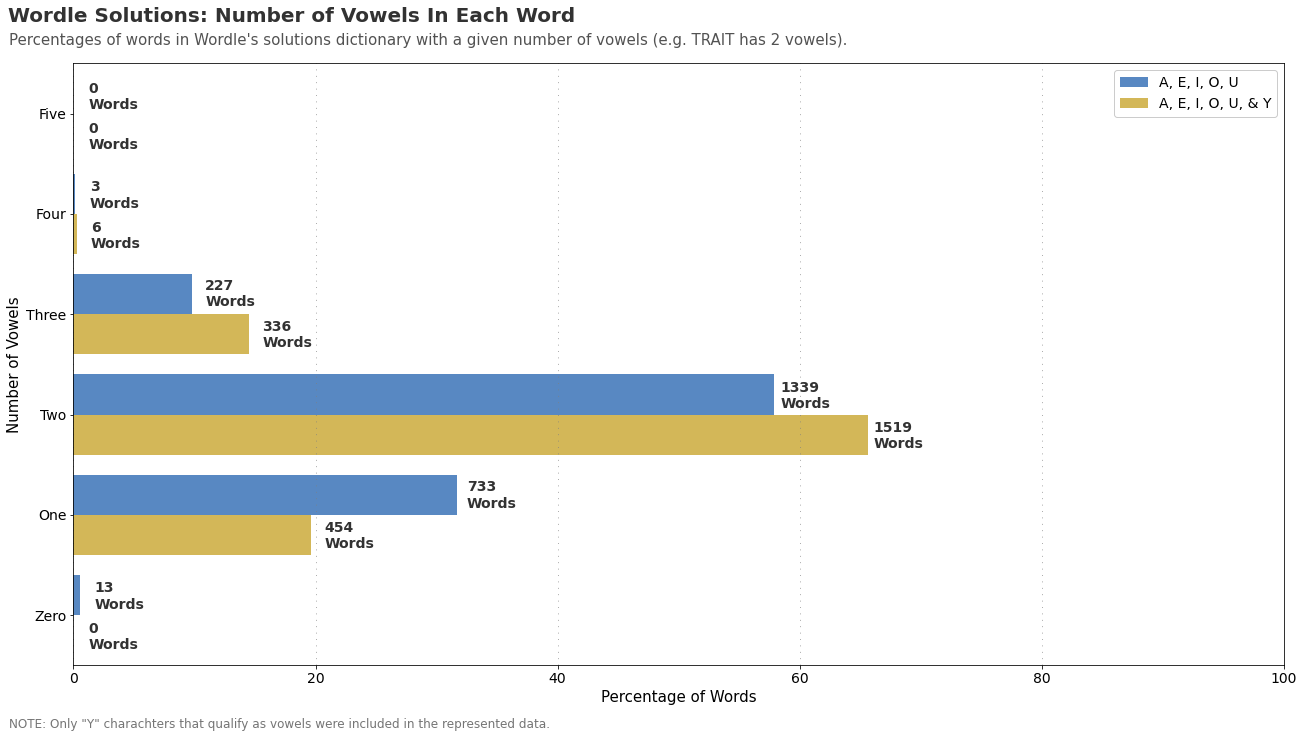

In [ ]:
#Plotting vowel counts
ax = plt.figure(figsize = (18, 9), constrained_layout=True)

#Figure annotations
plt.figtext(0.003, 1.059,'Wordle Solutions: Number of Vowels In Each Word', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Percentages of words in Wordle's solutions dictionary with a given number of vowels (e.g. TRAIT has 2 vowels).", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

plt.figtext(0.065, 0.9255,'0\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
plt.figtext(0.065, 0.8635,'0\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')

plt.figtext(0.066, 0.773,'3\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
plt.figtext(0.067, 0.711,'6\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')

plt.figtext(0.155, 0.621,'227\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
plt.figtext(0.199, 0.558,'336\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')

plt.figtext(0.599, 0.464,'1339\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
plt.figtext(0.671, 0.402,'1519\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')

plt.figtext(0.357, 0.31,'733\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
plt.figtext(0.247, 0.247,'454\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')

plt.figtext(0.070, 0.154,'13\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
plt.figtext(0.065, 0.092,'0\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')

plt.figtext(0.004, -0.03, 'NOTE: Only "Y" charachters that qualify as vowels were included in the represented data.', fontsize = 12, color = '#757575')

palette ={'A, E, I, O, U': '#4686d4', 'A, E, I, O, U, & Y': '#e8c243'}

ax1 = ax.add_subplot()
plt.title(f'', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax.patch.set_facecolor('white')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))

sns.barplot(data=VowelSolutionsCount2, x='Proportions', y='VowelCount', hue='Y', ax=ax1, palette=palette)
plt.legend(loc="upper right", ncol=1, framealpha=1, fontsize=14)   
plt.xlabel(f'Percentage of Words', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Number of Vowels', fontsize = 15, fontfamily='sans-serif')  
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.xlim(0,100);

ax.savefig(f'{directory}/Vowels in Each Word.png' , bbox_inches="tight", dpi=600)

##Unique Letters


In [ ]:
#Getting unique letter counts
solutions['UniqueLetters'] = ''

for word in solutions.index:
  if len(set(solutions['word'][word])) == 5:
    solutions['UniqueLetters'][word] = 'Five'
  elif len(set(solutions['word'][word])) == 4:
    solutions['UniqueLetters'][word] = 'Four'
  elif len(set(solutions['word'][word])) == 3:
    solutions['UniqueLetters'][word] = 'Three'
  elif len(set(solutions['word'][word])) == 2:
    solutions['UniqueLetters'][word] = 'Two'
  elif len(set(solutions['word'][word])) == 1:
    solutions['UniqueLetters'][word] = 'One'

In [ ]:
#Preparing for Plotting
UniqueSolutions = solutions['UniqueLetters'].value_counts(normalize=True).rename_axis('unique_values').to_frame('counts')
UniqueSolutionsCount = solutions['UniqueLetters'].value_counts().rename_axis('unique_values').to_frame('counts')

UniqueSolutions = UniqueSolutions.reset_index()

UniqueSolutions['counts'] = UniqueSolutions['counts']*100
UniqueSolutions2 = {'unique_values': 'One', 'counts': 0}
UniqueSolutions = UniqueSolutions.append(UniqueSolutions2, ignore_index = True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


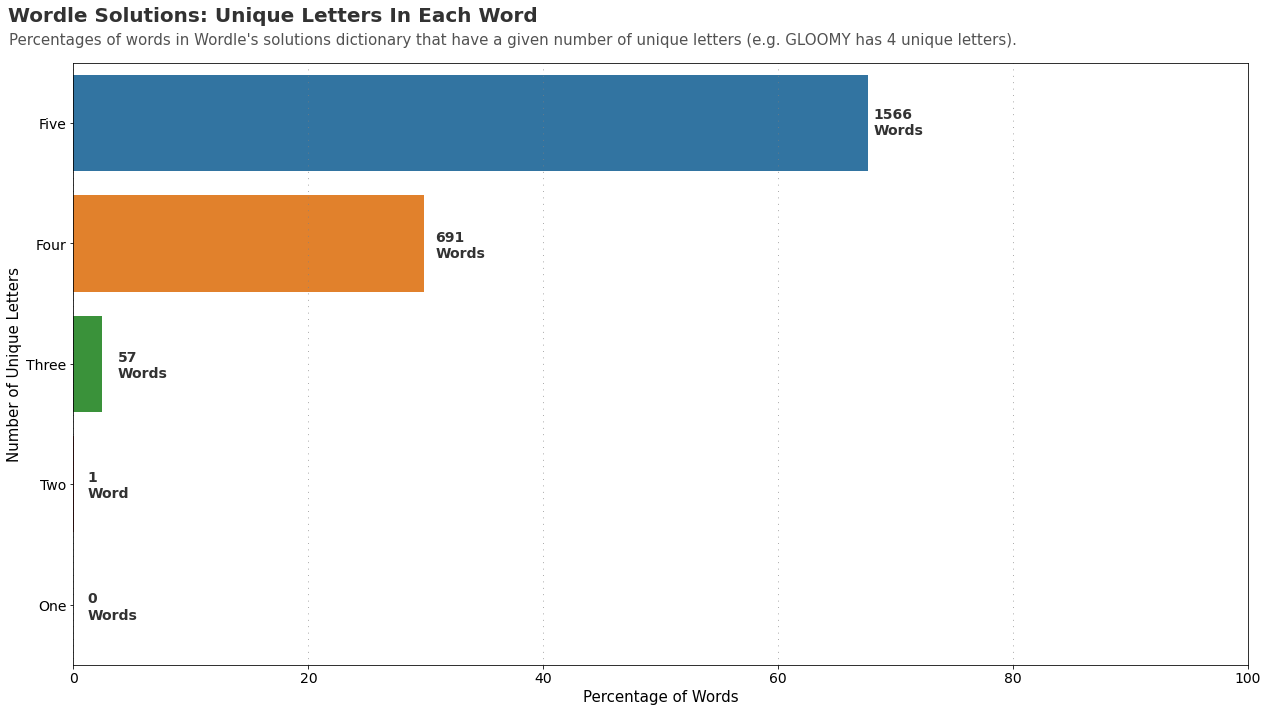

In [ ]:
#Plotting unique letters
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)

#Figure annotations
plt.figtext(0.003, 1.059,'Wordle Solutions: Unique Letters In Each Word', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Percentages of words in Wordle's solutions dictionary that have a given number of unique letters (e.g. GLOOMY has 4 unique letters).", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

plt.figtext(0.69, 0.885,'1566\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
plt.figtext(0.342, 0.695,'691\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
plt.figtext(0.090, 0.51,'57\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
plt.figtext(0.066, 0.324,'1\nWord', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
plt.figtext(0.066, 0.137,'0\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')

palette ={'Consonant': '#f79831', 'Vowel': '#4686d4', 'Both': '#e8c243'}

ax1 = ax.add_subplot()
plt.title(f'', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax.patch.set_facecolor('white')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))

# UniqueSolutions.plot(kind='bar', stacked=True, colormap='tab10', ax=ax1)
sns.barplot(data=UniqueSolutions, x='counts', y='unique_values', ax=ax1, dodge=False)
plt.legend(loc="upper right", ncol=1, framealpha=1, fontsize=14);  
plt.xlabel(f'Percentage of Words', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Number of Unique Letters', fontsize = 15, fontfamily='sans-serif')
ax1.legend().set_visible(False); 
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.xlim(0,100);

ax.savefig(f'{directory}/Unique Letters.png' , bbox_inches="tight", dpi=600)

## Most Common Repeated Letters

In [ ]:
#Calculating repeated letters

RepeatsList = []

for word in solutions_word_list:
  dict = {}
  for n in word:
      keys = dict.keys()
      if n in keys:
          dict[n] += 1
      else:
          dict[n] = 1

  for key, value in dict.items():
    if value == 2:
      RepeatsList.append(key)
    if value == 3:
      RepeatsList.append(key)
      RepeatsList.append(key)
    if value == 4:
      RepeatsList.append(key)
      RepeatsList.append(key)
      RepeatsList.append(key)
    if value == 5:
      RepeatsList.append(key)
      RepeatsList.append(key)
      RepeatsList.append(key)
      RepeatsList.append(key)

In [ ]:
#Plotting prep
counter=collections.Counter(RepeatsList)
kk=[list(counter.keys()),list(counter.values())]
Repeats = pd.DataFrame(np.array(kk).T, columns=['Letter','Repeats'])
Letters = Letters.merge(Repeats, on='Letter', how='left')
Letters = Letters.fillna(0)
Letters['Repeats'] = Letters['Repeats'].astype(float)

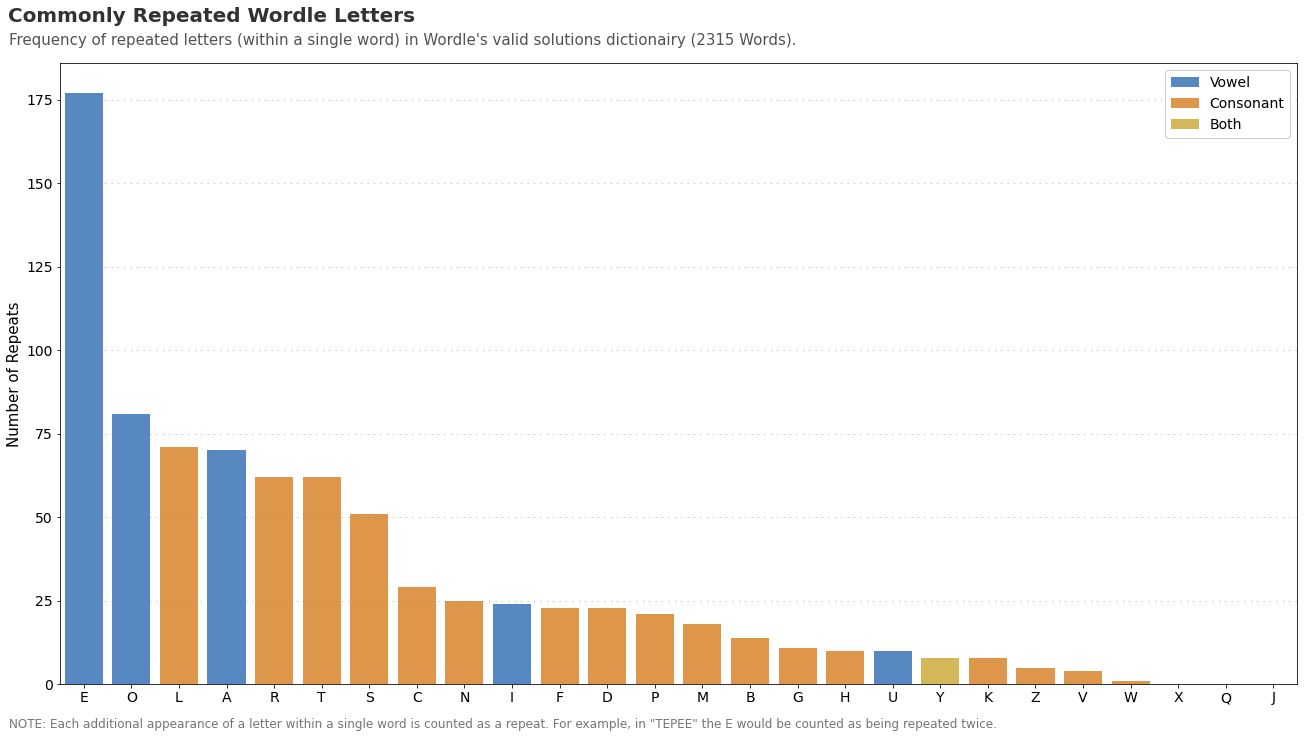

In [ ]:
#plotting common repeats
ax = plt.figure(figsize = (18, 9), constrained_layout=True)

#Figure annotations
plt.figtext(0.003, 1.059,'Commonly Repeated Wordle Letters', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Frequency of repeated letters (within a single word) in Wordle's valid solutions dictionairy (2315 Words).", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

plt.figtext(0.004, -0.03, 'NOTE: Each additional appearance of a letter within a single word is counted as a repeat. For example, in "TEPEE" the E would be counted as being repeated twice.', fontsize = 12, color = '#757575')

palette ={'Consonant': '#f79831', 'Vowel': '#4686d4', 'Both': '#e8c243'}

ax1 = ax.add_subplot()
plt.title(f'', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax.patch.set_facecolor('white')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))

sns.barplot(data=Letters.sort_values(by='Repeats', ascending=False), x='Letter', y='Repeats', ax=ax1, hue='Status', palette=palette, dodge=False)
plt.legend(loc="upper right", ncol=1, framealpha=1, fontsize=14)   
plt.xlabel(f'', fontsize = 13, fontfamily='sans-serif')
plt.ylabel('Number of Repeats', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');

ax.savefig(f'{directory}/Commonly Repeated Words Positions.png' , bbox_inches="tight", dpi=600)

##Parts of Speech


In [ ]:
#Getting Parts of Speech
POS_frequency = pd.read_csv(f'{directory}/POSsolutions.csv')
POS_frequencyCount = POS_frequency.drop(['Unnamed: 0','word'], axis=1)
POS_frequencySums = POS_frequencyCount[0:1]
POS_frequencySums['Noun'] = POS_frequencyCount['Noun'].sum()
POS_frequencySums['Verb'] = POS_frequencyCount['Verb'].sum()
POS_frequencySums['Adjective'] = POS_frequencyCount['Adjective'].sum()
POS_frequencySums['Adverb'] = POS_frequencyCount['Adverb'].sum()
POS_frequencySums = POS_frequencySums.melt()
POS_frequencySums['Percent']= ((POS_frequencySums['value']/2315)*100)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


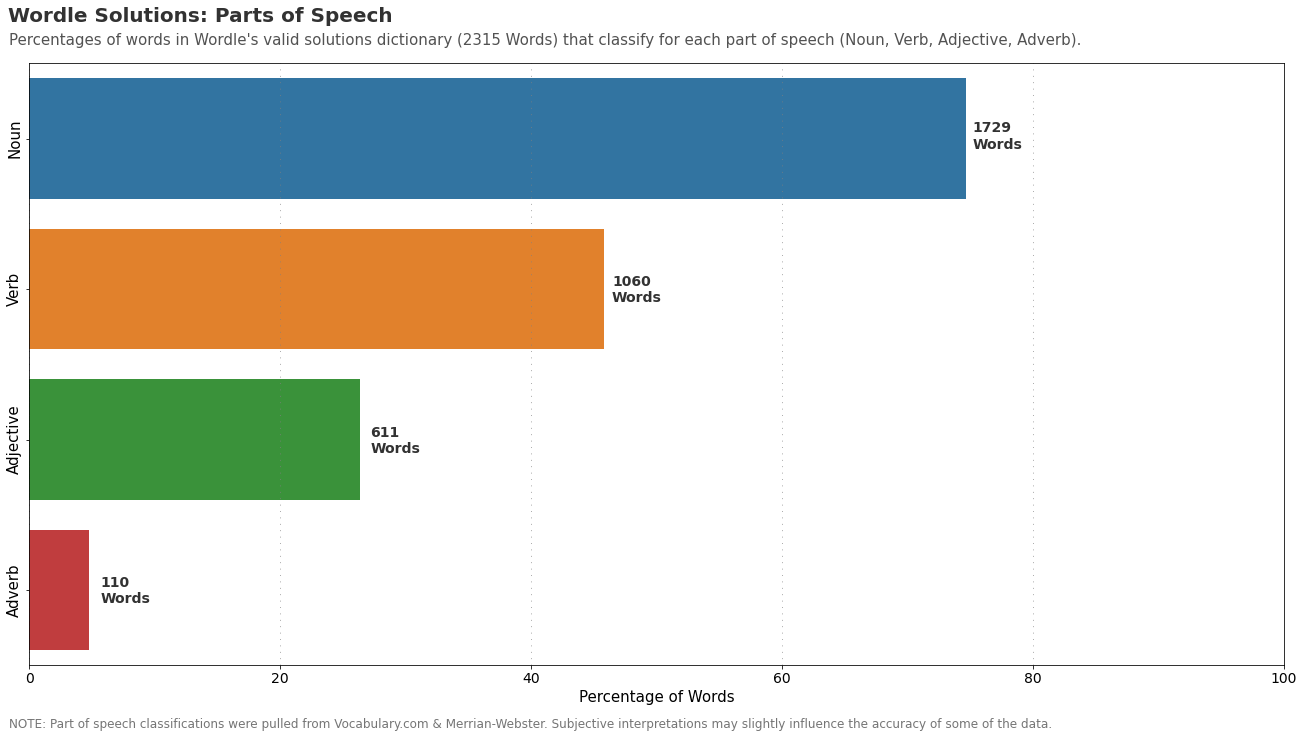

In [ ]:
#Plotting Parts of Speech
ax = plt.figure(figsize = (18, 9), constrained_layout=True)

#Figure annotations
plt.figtext(0.003, 1.059,'Wordle Solutions: Parts of Speech', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Percentages of words in Wordle's valid solutions dictionary (2315 Words) that classify for each part of speech (Noun, Verb, Adjective, Adverb).", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

plt.figtext(0.747, 0.864,'1729\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
plt.figtext(0.469, 0.627,'1060\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
plt.figtext(0.2825, 0.394,'611\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')
plt.figtext(0.074, 0.162,'110\nWords', fontfamily='sans-serif', fontsize=14, fontweight='bold', color='#323232')

plt.figtext(0.004, -0.03, 'NOTE: Part of speech classifications were pulled from Vocabulary.com & Merrian-Webster. Subjective interpretations may slightly influence the accuracy of some of the data.', fontsize = 12, color = '#757575')


palette ={'Consonant': '#f79831', 'Vowel': '#4686d4', 'Both': '#e8c243'}

ax1 = ax.add_subplot()
plt.title(f'', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax.patch.set_facecolor('white')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))

# UniqueSolutions.plot(kind='bar', stacked=True, colormap='tab10', ax=ax1)
sns.barplot(data=POS_frequencySums, x='Percent', y='variable', ax=ax1, dodge=False)
plt.legend(loc="upper right", ncol=1, framealpha=1, fontsize=14);   
plt.xlabel(f'Percentage of Words', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('', fontsize = 15, fontfamily='sans-serif')
ax1.legend().set_visible(False);       
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=15, fontfamily='sans-serif', rotation='vertical', va="center")
plt.xlim(0,100);

ax.savefig(f'{directory}/Parts of Speech.png' , bbox_inches="tight", dpi=600)